# Diabetes Dataset

#Intoduction:
Diabetes is a disease that occurs when our blood glucose is too high. Diabetes is a chronic disease and a major challenge across the world. Hence, identifying factors associated with disease is very important.Accurate and fast diagnosis/prediction of the disease will help us to avoid any future complications associated with diabetes.Some of the factors affecting Diabetes are Obesity, blood glucose, Family history, Age, insulin resistence, life style etc. In the given dataset all patients here are females of at least 21 years old, the data set contains 9 columns with 767 rows having the information of glucose, insulin, blood pressure, skin thicknesss, BMI of women associated with their pregnancy count .  \
Diabetes management remains a challenge for developed and developing countries alike. The implementation of evidence-based guidelines and restructuring of clinical care organization has yielded gains in some countries. There have been several attempts in developing countries as well to generate feasible and effective care systems. These initiatives and projects hold promise but much depends on the re-orientation of the overall health system for effective and sustainable care.

##Objective:
The objective of the dataset is to get the data ready for applying it to Machine learning models to predict whether or not a patient has diabetes.\
The aim of the project is to explore this dataset and find out factors that contribute the most for diabetes causation, data cleansing, feature engineering and use exploratory data analysis techniques to identify important features that may be crucial for important machine learning models.

##Dataset Description:
This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases.

Variables used in the dataset

 Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

 Blood Pressure: Diastolic blood pressure (mm Hg)

Skin Thickness: Triceps skin fold thickness (mm)

 Insulin: 2-Hour serum insulin (mu U/ml)

 BMI: Body mass index (weight in kg/(height in m)^2)

Diabetes Pedigree Function: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

##Installing required libraries

We start by installing the required libraries like NumPy, Pandas, Matplotlib, Seaborn missingo and simpleImputer

In [106]:
import numpy as np                     # Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer

##Readig the uploaded file
We read the files using pandas

In [107]:
var = pd.read_excel('Variables_diabetes_EDA (1).xlsx')
df = pd.read_excel('diabetes_mandatory_EDA (1).xlsx',names=var["Variables used"])
df.head(10)                    #Checking data of 1st 10 rows

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
5,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
6,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
7,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
8,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0
9,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0.0



###Performing basic exploration of data.
Finding the number of rows and columns:

In [69]:
print("Number of rows:",df.shape[0],"\n""Number of clomns:",df.shape[1])    #Number of rows & columns

Number of rows: 767 
Number of clomns: 9


Looking at the names of the Columns:

In [70]:
df.columns     #Finding column names

Index(['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

Renaming the columns with proper names

In [108]:
D=df.rename(columns={'Blood Pressure':'Blood_Pressure','Skin Thickness':'Skin_Thickness','Diabetes Pedigree Function':'Diabetes_Pedigree_Function'})    #Renaming the columns with rename function
D.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


Looking at the Data structure

In [72]:
D.info()           #getting the info of the dataset, like null values and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 767 non-null    float64
 1   Glucose                     767 non-null    float64
 2   Blood_Pressure              767 non-null    float64
 3   Skin_Thickness              767 non-null    float64
 4   Insulin                     767 non-null    float64
 5   BMI                         767 non-null    float64
 6   Diabetes_Pedigree_Function  767 non-null    float64
 7   Age                         767 non-null    float64
 8   Outcome                     767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [109]:
D = D.astype({"Outcome":'category'}) #converting the data type to correct format
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Pregnancies                 767 non-null    float64 
 1   Glucose                     767 non-null    float64 
 2   Blood_Pressure              767 non-null    float64 
 3   Skin_Thickness              767 non-null    float64 
 4   Insulin                     767 non-null    float64 
 5   BMI                         767 non-null    float64 
 6   Diabetes_Pedigree_Function  767 non-null    float64 
 7   Age                         767 non-null    float64 
 8   Outcome                     767 non-null    category
dtypes: category(1), float64(8)
memory usage: 48.9 KB


In [7]:
D.nunique()     #To find number of unique values

Pregnancies                    17
Glucose                       136
Blood_Pressure                 47
Skin_Thickness                 51
Insulin                       186
BMI                           248
Diabetes_Pedigree_Function    516
Age                            52
Outcome                         2
dtype: int64

In [8]:
D.isna().sum()  #Finding number of null values

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

In [10]:
D.duplicated().sum()  #To check duplicates in data

0

Getting numerical Discriptive Stats.

In [110]:
D.describe() #describe() method is used to get some statistical data

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


As we can see from the above Discriptive Stats the min value of Glucose, Blood Pressure, Skin Thickness, Insulin is '0', which is practically imposible.
Hence we will check the number '0' present in each column.

In [11]:
#Getting the 0's from each column
(D.Glucose==0).sum(),(D.Blood_Pressure==0).sum(),(D.Skin_Thickness==0).sum(),(D.Insulin==0).sum(),(D.BMI==0).sum(),(D.Diabetes_Pedigree_Function==0).sum(),(D.Age==0).sum()

(5, 35, 227, 373, 11, 0, 0)

From the above we can see that there are a lot of '0' present, which alters the analysis.

Now we shall replace the '0' present in some of the above mentioned columns with NaN for further analysis and better data.

In [111]:
D['Glucose'] = D['Glucose'].replace(0,np.NaN) #replace method is used to replace 0 with NAN
D['Blood_Pressure'] = D['Blood_Pressure'].replace(0,np.NaN)
D['Skin_Thickness'] = D['Skin_Thickness'].replace(0,np.NaN)
D['Insulin'] = D['Insulin'].replace(0,np.NaN)
D['BMI'] = D['BMI'].replace(0,np.NaN)
D.head() #using head function to see first 5 rows

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30.0,0.0


Now when we look at the Data structure we can clearly see the number of non null values.

In [13]:
D.info()               #getting the info of the dataset, like null values and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Pregnancies                 767 non-null    float64 
 1   Glucose                     762 non-null    float64 
 2   Blood_Pressure              732 non-null    float64 
 3   Skin_Thickness              540 non-null    float64 
 4   Insulin                     394 non-null    float64 
 5   BMI                         756 non-null    float64 
 6   Diabetes_Pedigree_Function  767 non-null    float64 
 7   Age                         767 non-null    float64 
 8   Outcome                     767 non-null    category
dtypes: category(1), float64(8)
memory usage: 48.9 KB


In [112]:
D.describe()      #describe() method is used to get some statistical data

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
count,767.000000,762.000000,732.000000,540.000000,394.000000,756.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,29.142593,155.548223,32.455952,0.471674,33.219035
std,3.370877,30.540786,12.390616,10.483667,118.775855,6.929448,0.331497,11.752296
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000
75%,6.000000,140.750000,80.000000,36.000000,190.000000,36.600000,0.625000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Finding the missing values and percentage of missing data for each column.

In [15]:
D_miss = D.isnull()  #To find missing values
D_miss.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False


In [16]:
D_miss.mean() * 100  # finding the percentage of missing values.

Pregnancies                    0.000000
Glucose                        0.651890
Blood_Pressure                 4.563233
Skin_Thickness                29.595828
Insulin                       48.631030
BMI                            1.434159
Diabetes_Pedigree_Function     0.000000
Age                            0.000000
Outcome                        0.000000
dtype: float64

From the above we can clearly see only two columns has major missing values that is of 29.6% and 48.63%

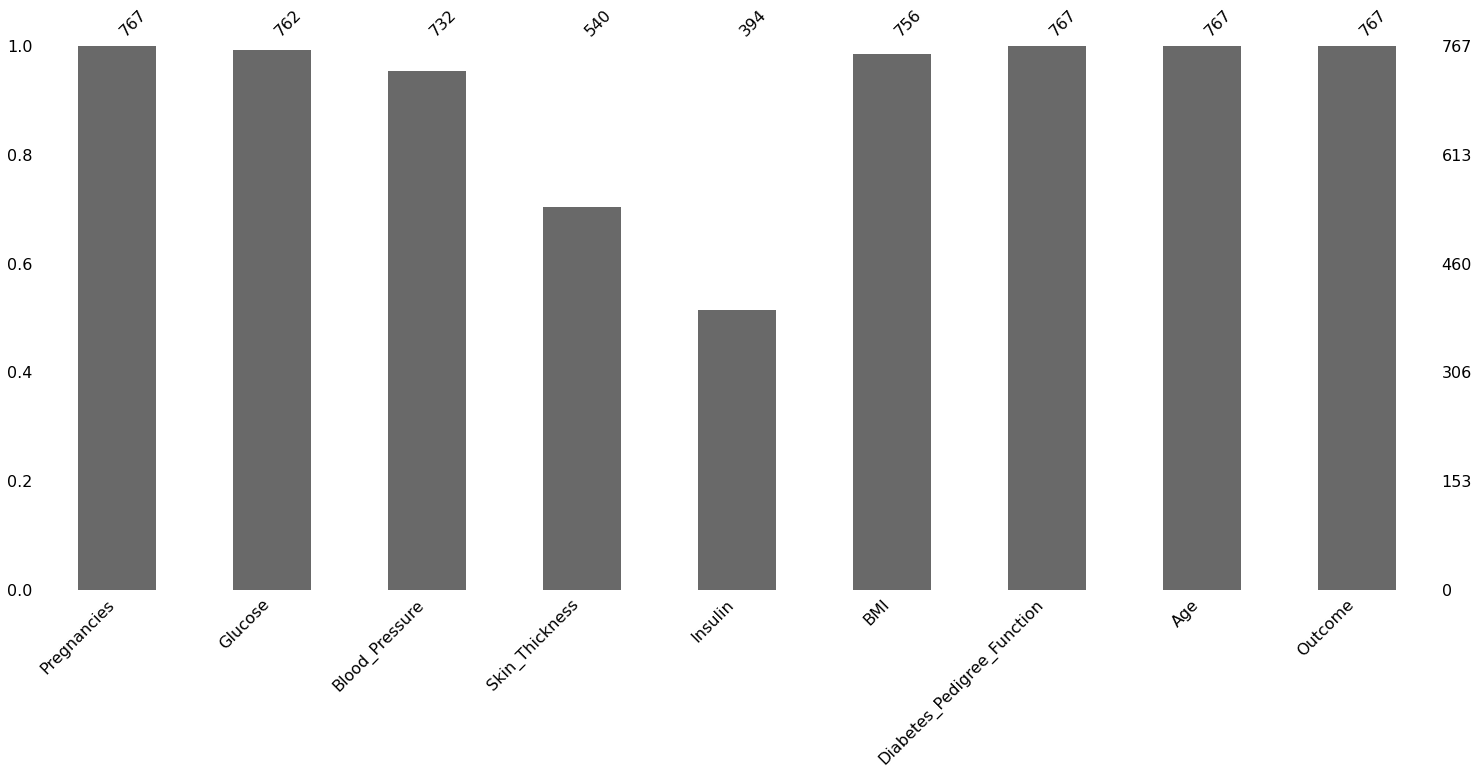

In [18]:
msno.bar(D) # Visulaizing the missing values

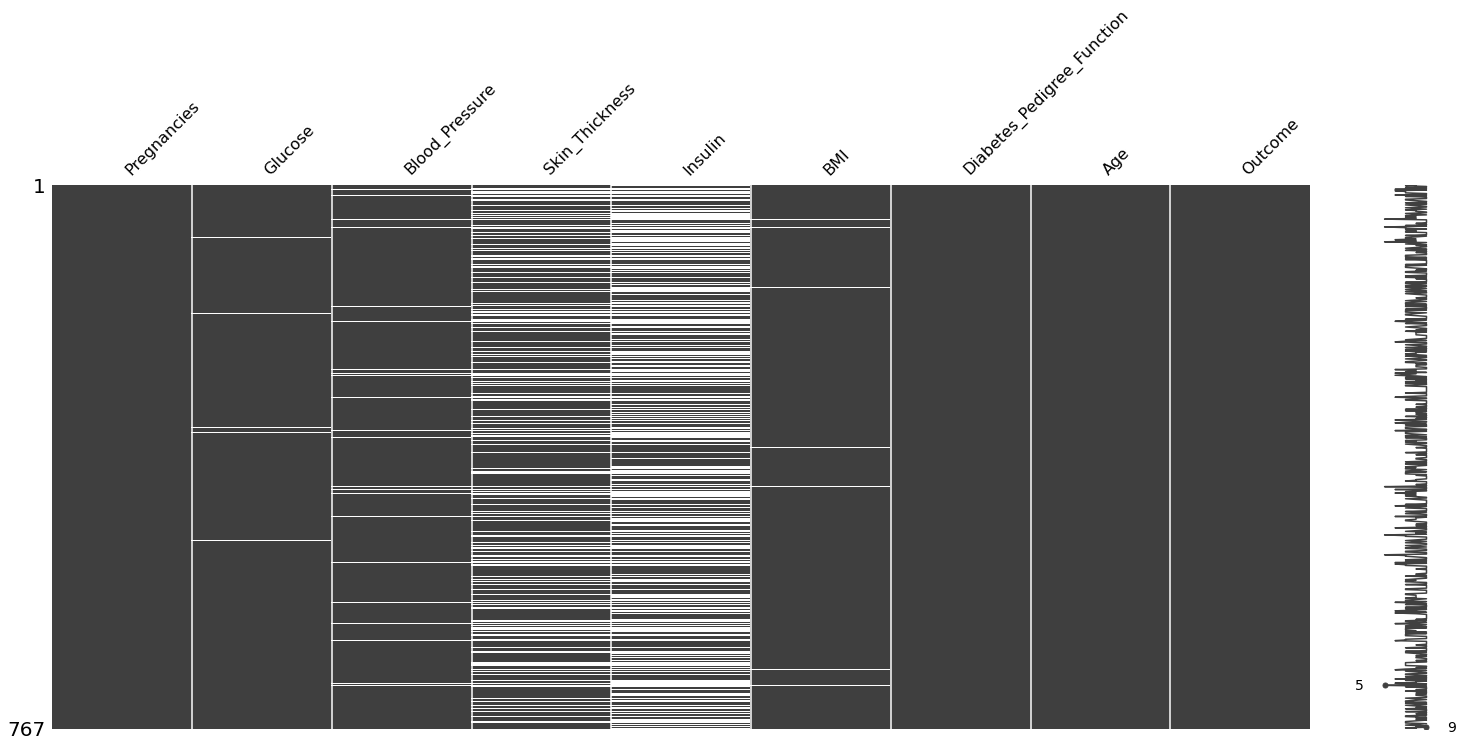

In [33]:
msno.matrix(D) #ploting the graph to view the positons of missing values

From the above graph we can see the amount of data missing, if we try to remove all the missing value data together we might loose more than 50% of the data, therfore replacing the missing values is better option.

Now we will analyze histogram of all the independent variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6084990e90>,
      dtype=object)

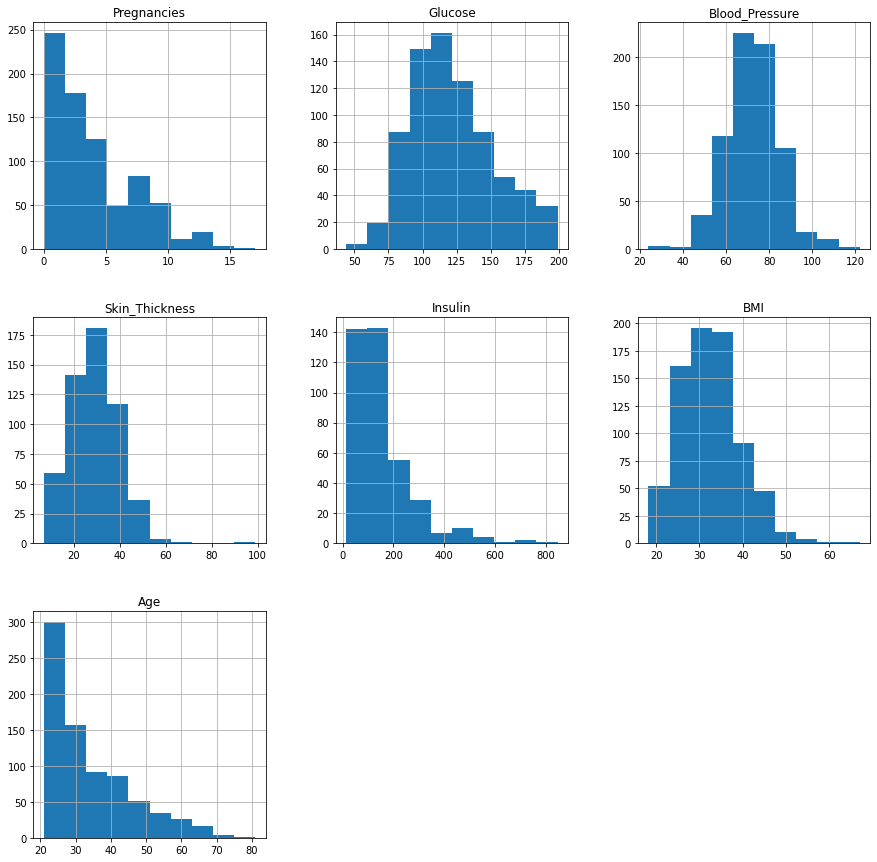

In [75]:
B= D.drop(['Outcome','Diabetes_Pedigree_Function'],axis=1)
B.hist(figsize=(15,15),bins=10) #Drwing histogram

From the above graphs we can clearly say that:\
Pregnency is right skewed or positively skewed we can expect this as it is discrete variable.\
Glucose and Blood Pressure looks normaly distributed.\
Skin thinkness, Insulin, BMI, Age are positively skewed data or right skewed.

In [18]:
#Skewness
B.skew()

Pregnancies       0.903976
Glucose           0.533978
Blood_Pressure    0.133928
Skin_Thickness    0.693369
Insulin           2.166464
BMI               0.594261
Age               1.135165
dtype: float64

Skewness between 0.5 to -0.5 is considered fairly symmetrical.\
Skewness between -1 to -0.5 or 0.5 to 1 is considered Moderately Skewed.\
Skewness less than -1 or greater than 1 is considered Highly Skewed.\
\
So we can say that Blood Pressure is Symmetrical.\
Pregnancies,Glucose, Skinthickness, BMI are moderately skewed.\
Insulin and Age are highly skewed data.

Based on the above skewness patern and data obtained we can proceed with filling the data.

In [113]:
D['Glucose'].fillna(D['Glucose'].median(), inplace = True) #Replacing NaN with fill function
D['Blood_Pressure'].fillna(D['Blood_Pressure'].mean(), inplace = True)
D['Skin_Thickness'].fillna(D['Skin_Thickness'].median(), inplace = True)
D['Insulin'].fillna(D['Insulin'].median(), inplace = True)
D['BMI'].fillna(D['BMI'].median(), inplace = True)
D.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0.0


We have filled all the missing values in Glucose, Skin Thickness, Insulin and BMI with Median as these datas are moderately or Highly skewed.\
We have filled all the missing values in Blood pressure with mean as it is fairly symetrical.

In [81]:
def outliers(d1,*var):                         #defining a function called Outliers
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Outliers in {i}', fontsize=15)   #drawing the required plot by defining a function.
        sns.boxplot(data= d1, x=i)
        plt.show()
        print()
        q1,q2 = np.percentile(d1[i],(25,75))
        IQR = q2 -q1                                   #Calculating IQR
        Max = q2 + 1.5 * IQR
        Min = q1 - 1.5 * IQR
        Outlayer = d1[(d1[i]<Min) | (d1[i]>Max)]
        print(f'Outliers in {i}: ', round(Outlayer.shape[0]/d1.shape[0]*100,2),'%')   #Calculating the % of outlayer. 
        print()

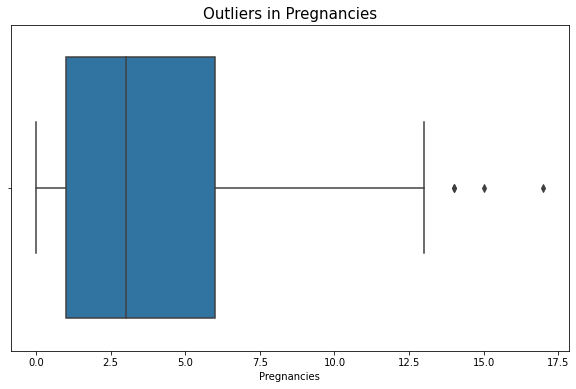


Outliers in Pregnancies:  0.52 %



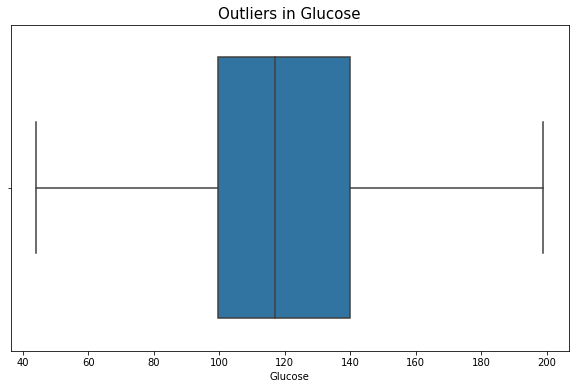


Outliers in Glucose:  0.0 %



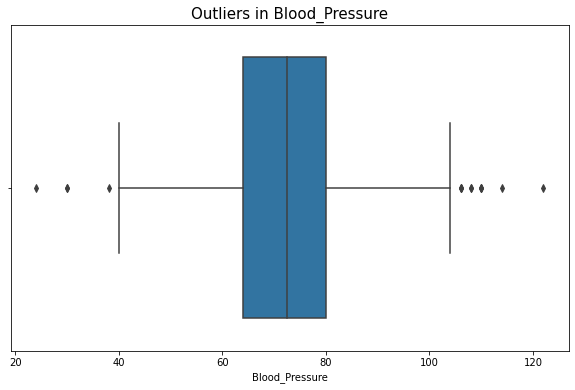


Outliers in Blood_Pressure:  1.83 %



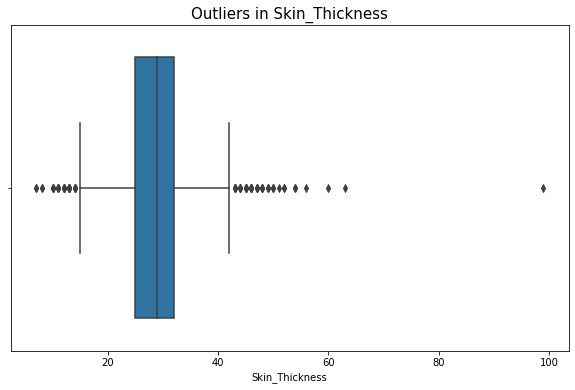


Outliers in Skin_Thickness:  11.34 %



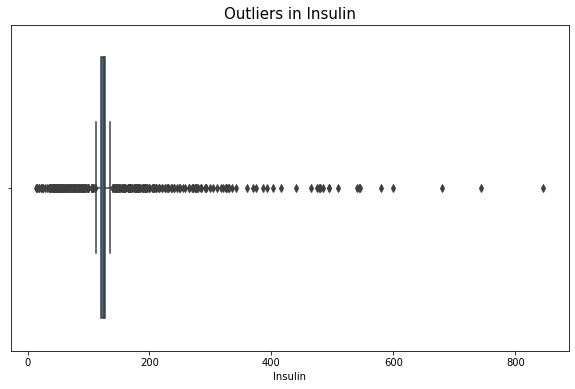


Outliers in Insulin:  44.98 %



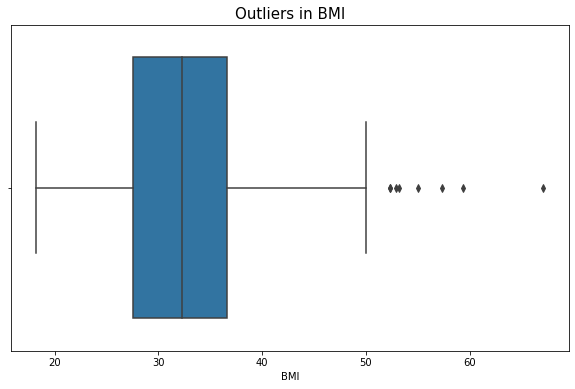


Outliers in BMI:  1.04 %



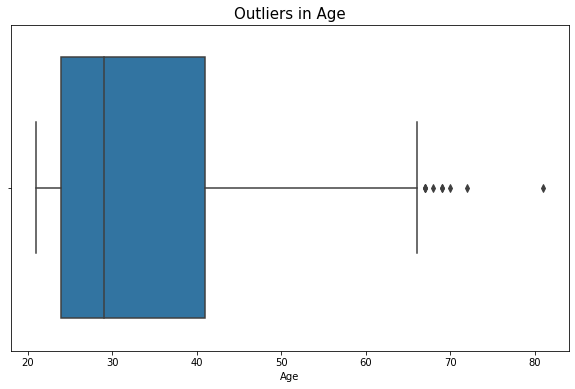


Outliers in Age:  1.17 %



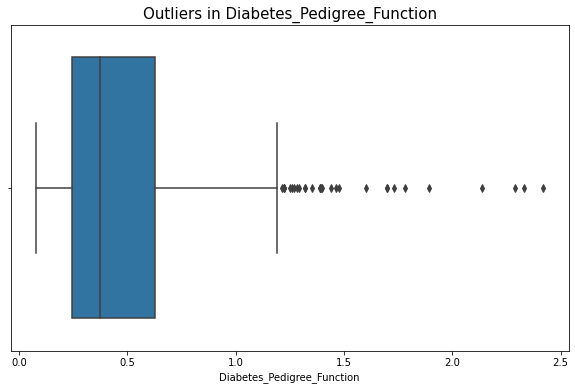


Outliers in Diabetes_Pedigree_Function:  3.78 %



In [82]:
outliers(D,'Pregnancies','Glucose', 'Blood_Pressure','Skin_Thickness','Insulin','BMI','Age','Diabetes_Pedigree_Function')  # Calling the above defined function to get the results.

From the above we can clearly see the outliers as well as percentage of outliers, insulin column has the highest outliers.

Drawing box plot to see all columns outliers.

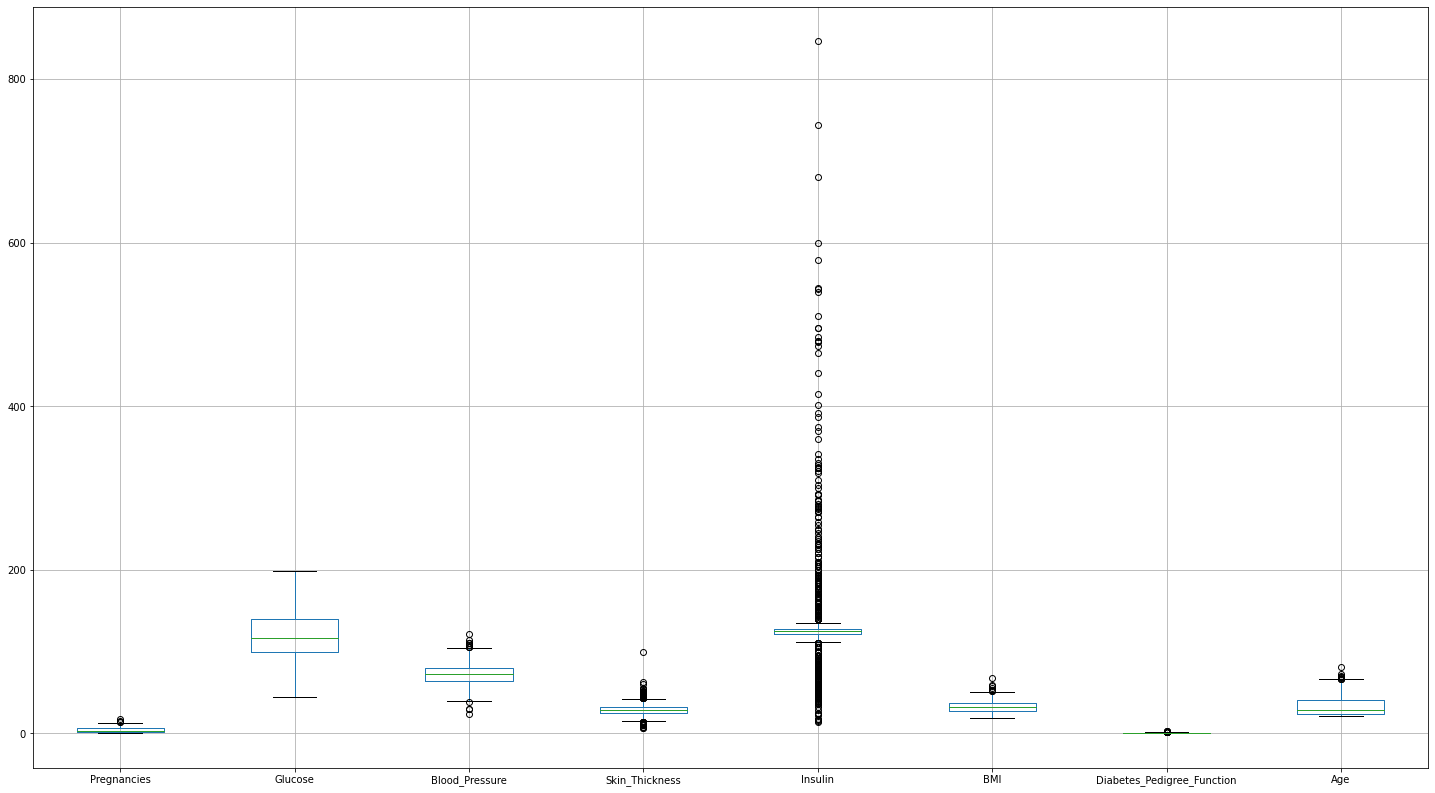

In [79]:
plt.figure(figsize=(25,14))
D.boxplot()

Performing log Transformation:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f607edfd150>,
      dtype=object)

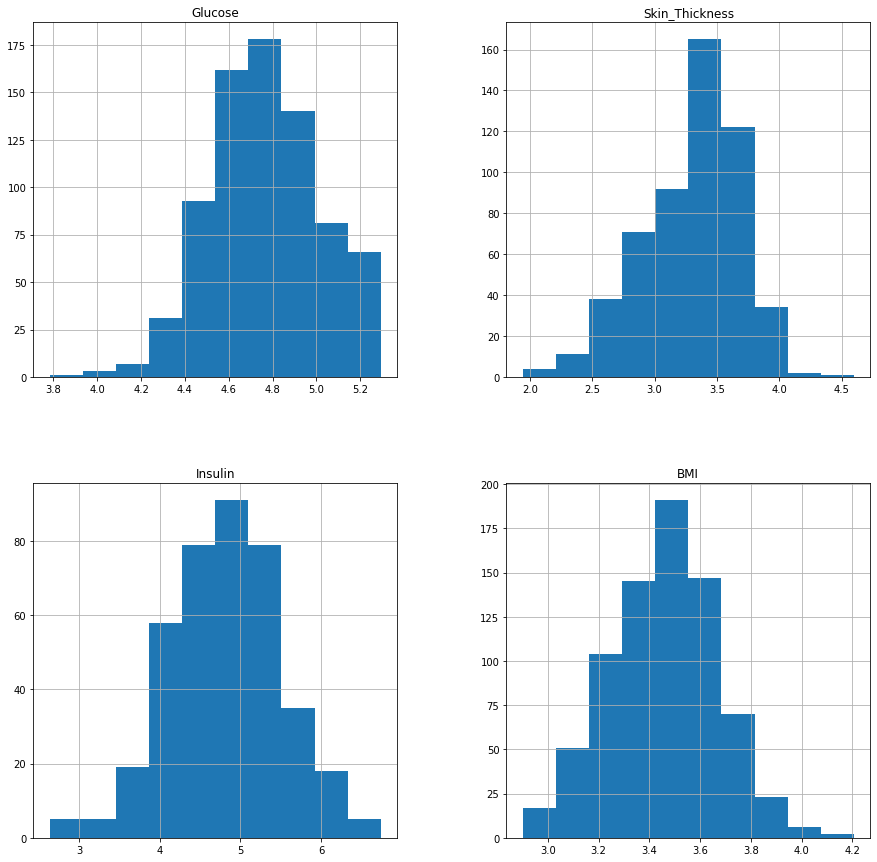

In [77]:
K = B.drop(['Pregnancies','Blood_Pressure','Age'],axis=1)
for i in K:
 K[i] = np.log(K[i]) #Using Log function for transformation.
K.hist(figsize=(15,15),bins=10)

Performed log transformation to reduce skewness, from the above graph we can see that all 4 graphs have achived somewhat symetrical shape, we have used log transform here as it is very popular and we get the desired results most of the time.

Finding out the corelation between the columns.

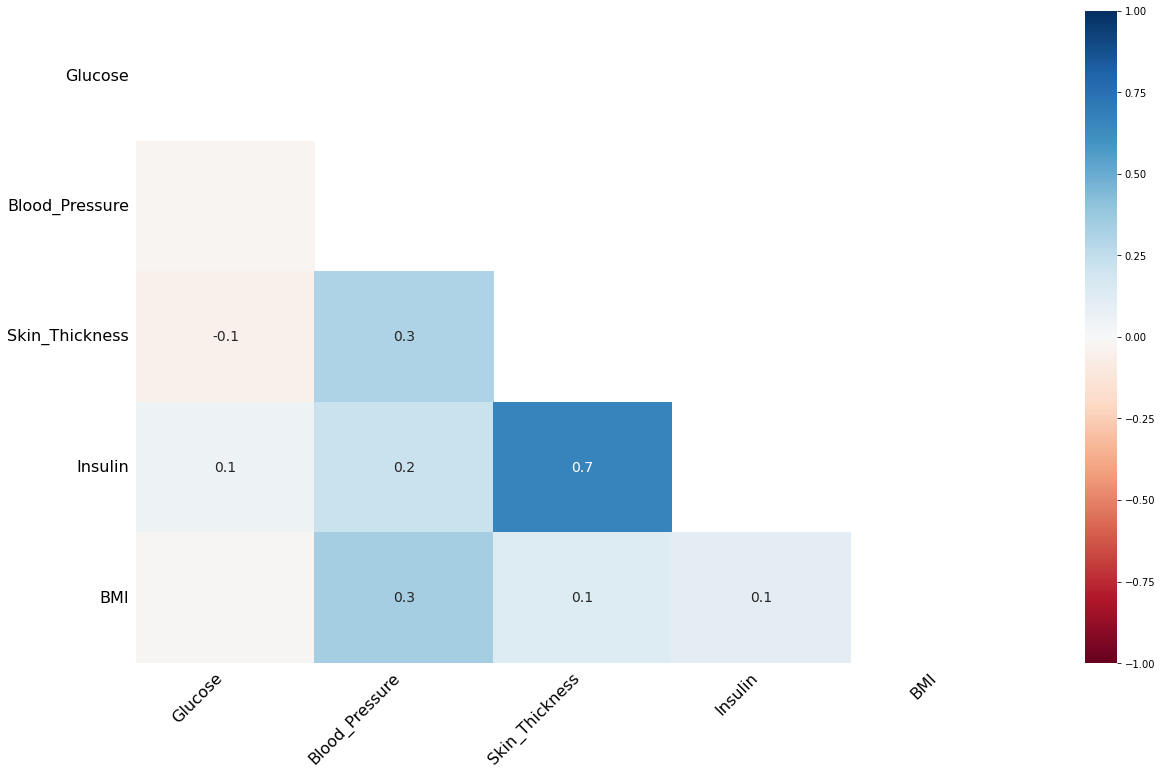

In [34]:
msno.heatmap(D) # Heatmap graph ussing missingno

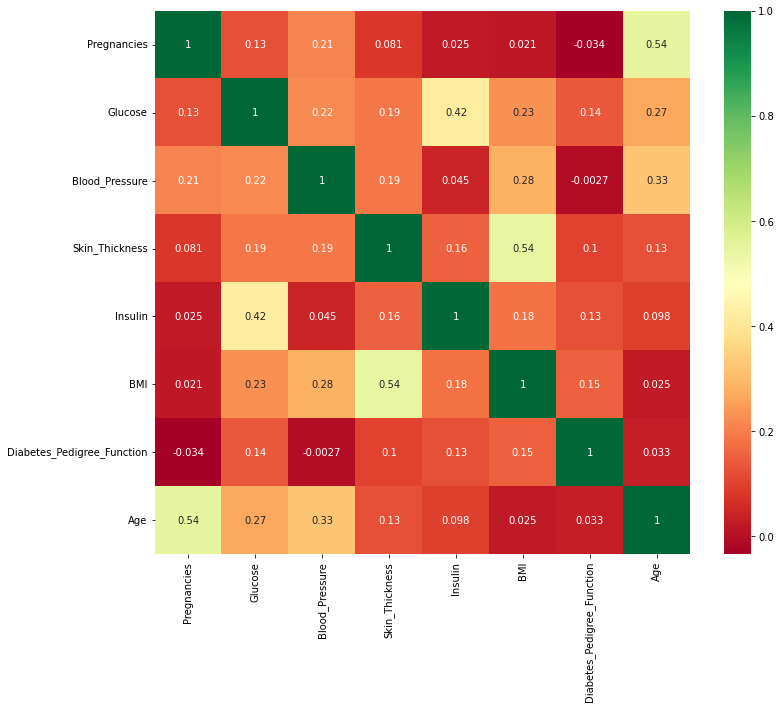

In [20]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(D.corr(), annot=True,cmap ='RdYlGn')

Correlation tells us about the strength of association between two variables. It lies between 0- no correlation and 1- maximum correlation. It tells about how strong is the association between two variables.\
It is easy to see that there is no single feature that has a very high correlation with our outcome value. Some of the features have a negative correlation with the outcome value and some have positive.\
However Insulin and glucose, Skin thickness and BMI, pregnancie and age are slightly corelated compared to other features.

Let’s also look at how many people in the dataset are diabetic and how many are not

In [16]:
D['Outcome'].value_counts()         #using value counts to count the catogerical data

0.0    500
1.0    267
Name: Outcome, dtype: int64

0.0 ---> Non Diabetic\
1.0 ---> Diabetic

Text(0.5, 0.98, 'Distribution of Outcome')

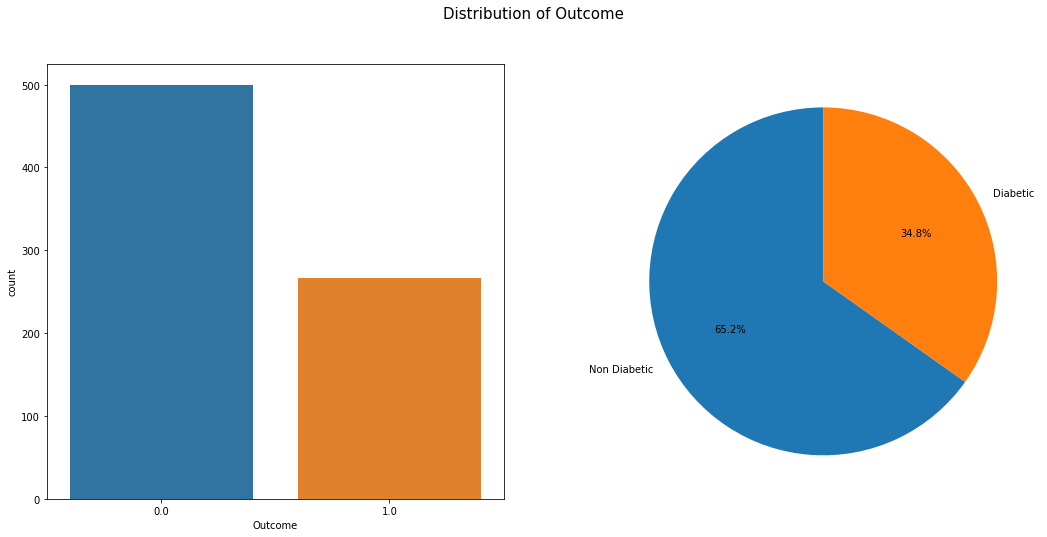

In [12]:
fig ,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(x=D.Outcome, ax=ax[0]) #Drawing count plot
D['Outcome'].value_counts().plot(kind='pie',labels =['Non Diabetic','Diabetic'] , autopct='%1.1f%%',startangle=90, ax=ax[1]) #Drawing pie chart
ax[1].set_ylabel('')
fig.suptitle('Distribution of Outcome', fontsize=15) 

From the above graph we can clearly see that the data is more of non diabetic patients that is the outcome having 0, The number of non diabetic patients is almost double of diabetic patients.

Now we shall get the average of all features grouped by Outcome

In [17]:
D.groupby('Outcome').mean()     #getting the average of all columns by using mean() and grouping the result using groupby based on outcome

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
Outcome,,,,,,,,
0.0,3.298000,110.682000,70.935418,27.726000,127.792000,30.885600,0.429734,31.190000
1.0,4.861423,142.108614,75.159145,31.674157,164.850187,35.390262,0.550213,37.018727


From the above we can clearly see the avrage Glucose level, Skin Thickness, Blood Pressure, Insulin level is more for Diabetic people. Also from age column we can say that people with more age are more suseptable to Diabetic.  

Histogram for Diabetic cases

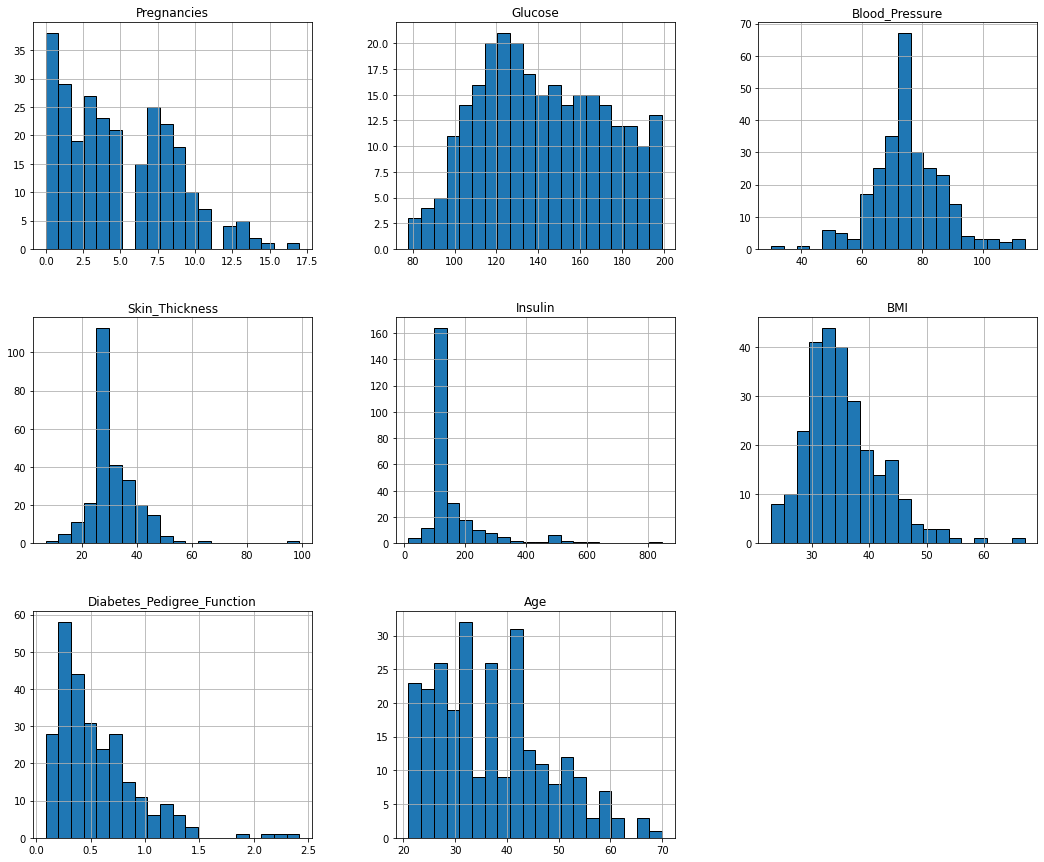

In [13]:
D1 = D[D['Outcome']==1]
D1.hist(figsize=(18,15),bins=20, edgecolor='black')
plt.show()

Histogram for Non Diabetic cases

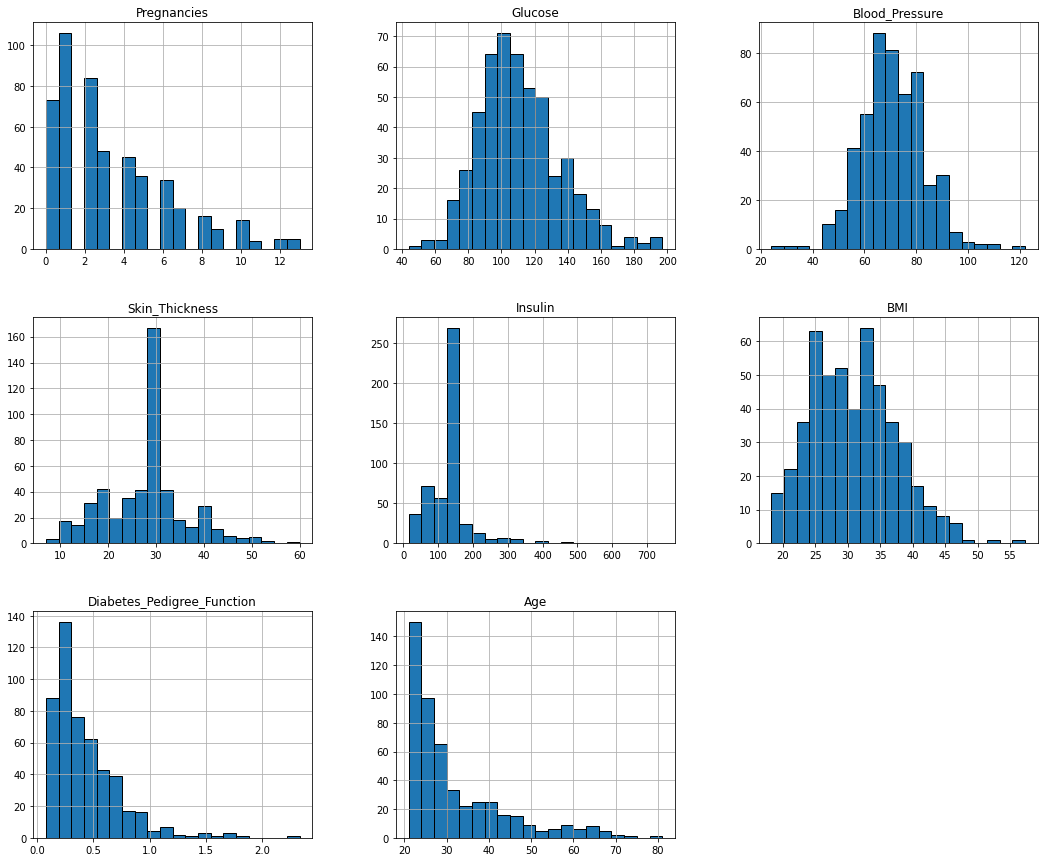

In [14]:
D2 = D[D['Outcome']==0]
D2.hist(figsize=(18,15),bins=20, edgecolor='black')
plt.show()

From the above two plots which is for Diabetic and non diabetic, it shows how each feature and label is distributed along different ranges, which further confirms the need for scalin.\
We can also see that the density of Glucose is high for Diabetic cases compared to non diabetic.\
We can see the age group density we can see that age group of around 30-45 are more suseptable to Diabeties.\
The BMI density is much high in the range 30-45 for diabetic cases where as BMI density is high in the range 22-37 for non-diabetic cases.\
Even the density of Skin thickness and Insulin is high for higher range for diabetic cases compared to non diabetic cases.

Checking the relation of pregnency and outcome:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


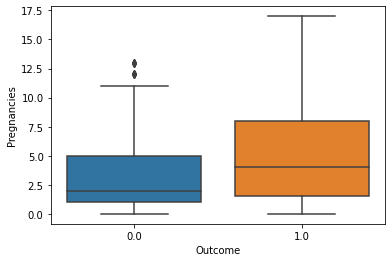

In [15]:
sns.boxplot(D['Outcome'], D["Pregnancies"]) #using seaborn to plot boxplot
plt.show()

From the above plot we can infer that patients who have higher pregnency rate are more susceptable to diabetic.

Checking the relation of Glucose and outcome:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


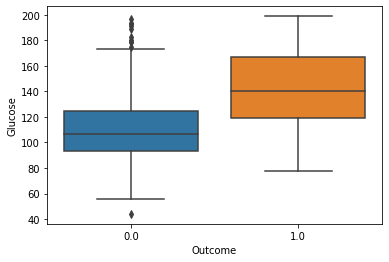

In [34]:
sns.boxplot(D['Outcome'], D["Glucose"]) #using seaborn to plot boxplot
plt.show()

From the above plot we can infer that patients who are diabetic have higher glucose concentration compared to non diabetic.

Checking the relation of Blood Pressure and outcome:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


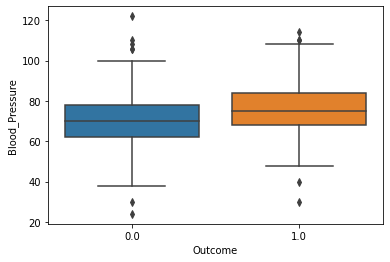

In [36]:
sns.boxplot(D['Outcome'], D["Blood_Pressure"]) #using seaborn to plot boxplot
plt.show()

From the above plot we can infer that patients who are diabetic have higher blood pressure compared to non diabetic.

Checking the relation of Skin Thickness and outcome:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


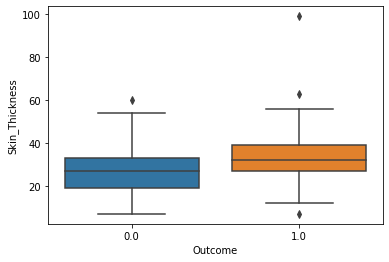

In [37]:
sns.boxplot(D['Outcome'], D["Skin_Thickness"]) #using seaborn to plot boxplot
plt.show()

From the above plot we can infer that patients who are diabetic have higher skin thickness compared to non diabetic.

Checking the relation of Insulin and outcome:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


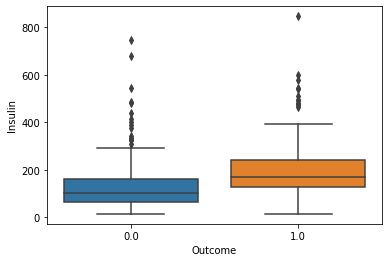

In [38]:
sns.boxplot(D['Outcome'], D["Insulin"]) #using seaborn to plot boxplot
plt.show()

From the above plot we can infer that patients who are diabetic have higher Insulin concentration compared to non diabetic.

Checking the relation of BMI and outcome:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


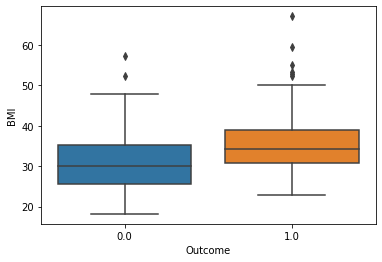

In [39]:
sns.boxplot(D['Outcome'], D["BMI"]) #using seaborn to plot boxplot
plt.show()

From the above plot we can infer that patients who are diabetic have higher BMI compared to non diabetic.

Checking the relation of Diabetes Pedigree Function and outcome:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


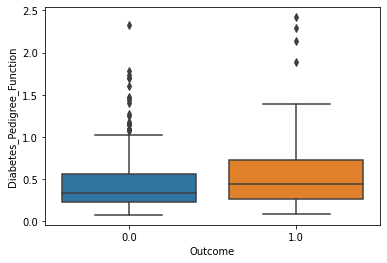

In [40]:
sns.boxplot(D['Outcome'], D["Diabetes_Pedigree_Function"]) #using seaborn to plot boxplot
plt.show()

From the above plot we can infer that patients who are diabetic have higher Diabetes Pedigree Function compared to non diabetic.

Checking the relation of Age and outcome:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


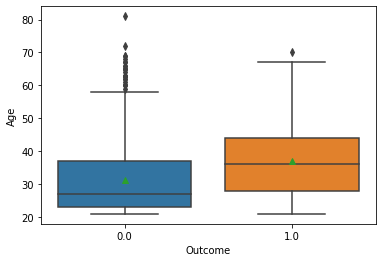

In [42]:
sns.boxplot(D['Outcome'], D["Age"], showmeans = True) #using seaborn to plot boxplot
plt.show()

From the above plot we can infer that patients who are diabetic have higher Age compared to non diabetic, we can clearly see the average age of around 37 is are more susceptible to diabetic. 

Checking the relation of Insulin and Glucose:

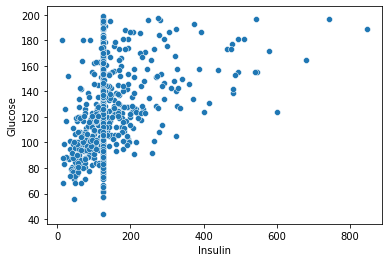

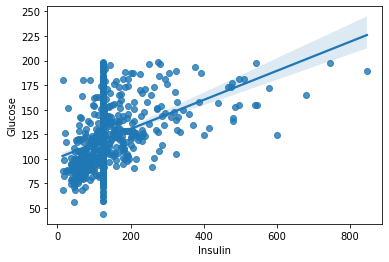

In [83]:
sns.scatterplot(x=D.Insulin, y=D.Glucose) #Drawing Scatter plot
plt.show()
sns.regplot(x=D.Insulin, y=D.Glucose)
plt.show()

From the above we can see a linear relation between glucose and insuin, also as the insulin data is higly skewed we cannot conclude the relationship between glucose and insulin, we are getting a mere perpendicular line in the plot due to replacement of missing values of insulin with median.

Checking the relation of Insulin and Blood Pressure:

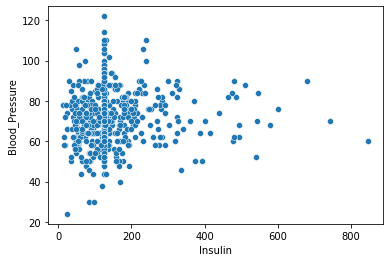

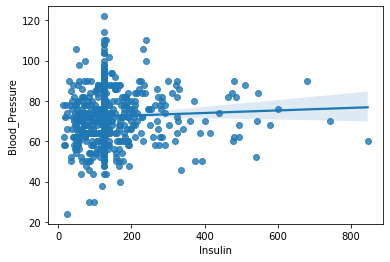

In [84]:
sns.scatterplot(x=D.Insulin, y=D.Blood_Pressure) #Drawing Scatter plot
plt.show()
sns.regplot(x=D.Insulin, y=D.Blood_Pressure)
plt.show()

From the above we can see a slight or no linear relation between Blood Pressure and insuin, also as the insulin data is higly skewed we cannot conclude the relationship between Blood Pressure and insulin, we are getting a mere perpendicular line in the plot due to replacement of missing values of insulin with median.

Now Drawing pairplot of all attributes in the dataset:

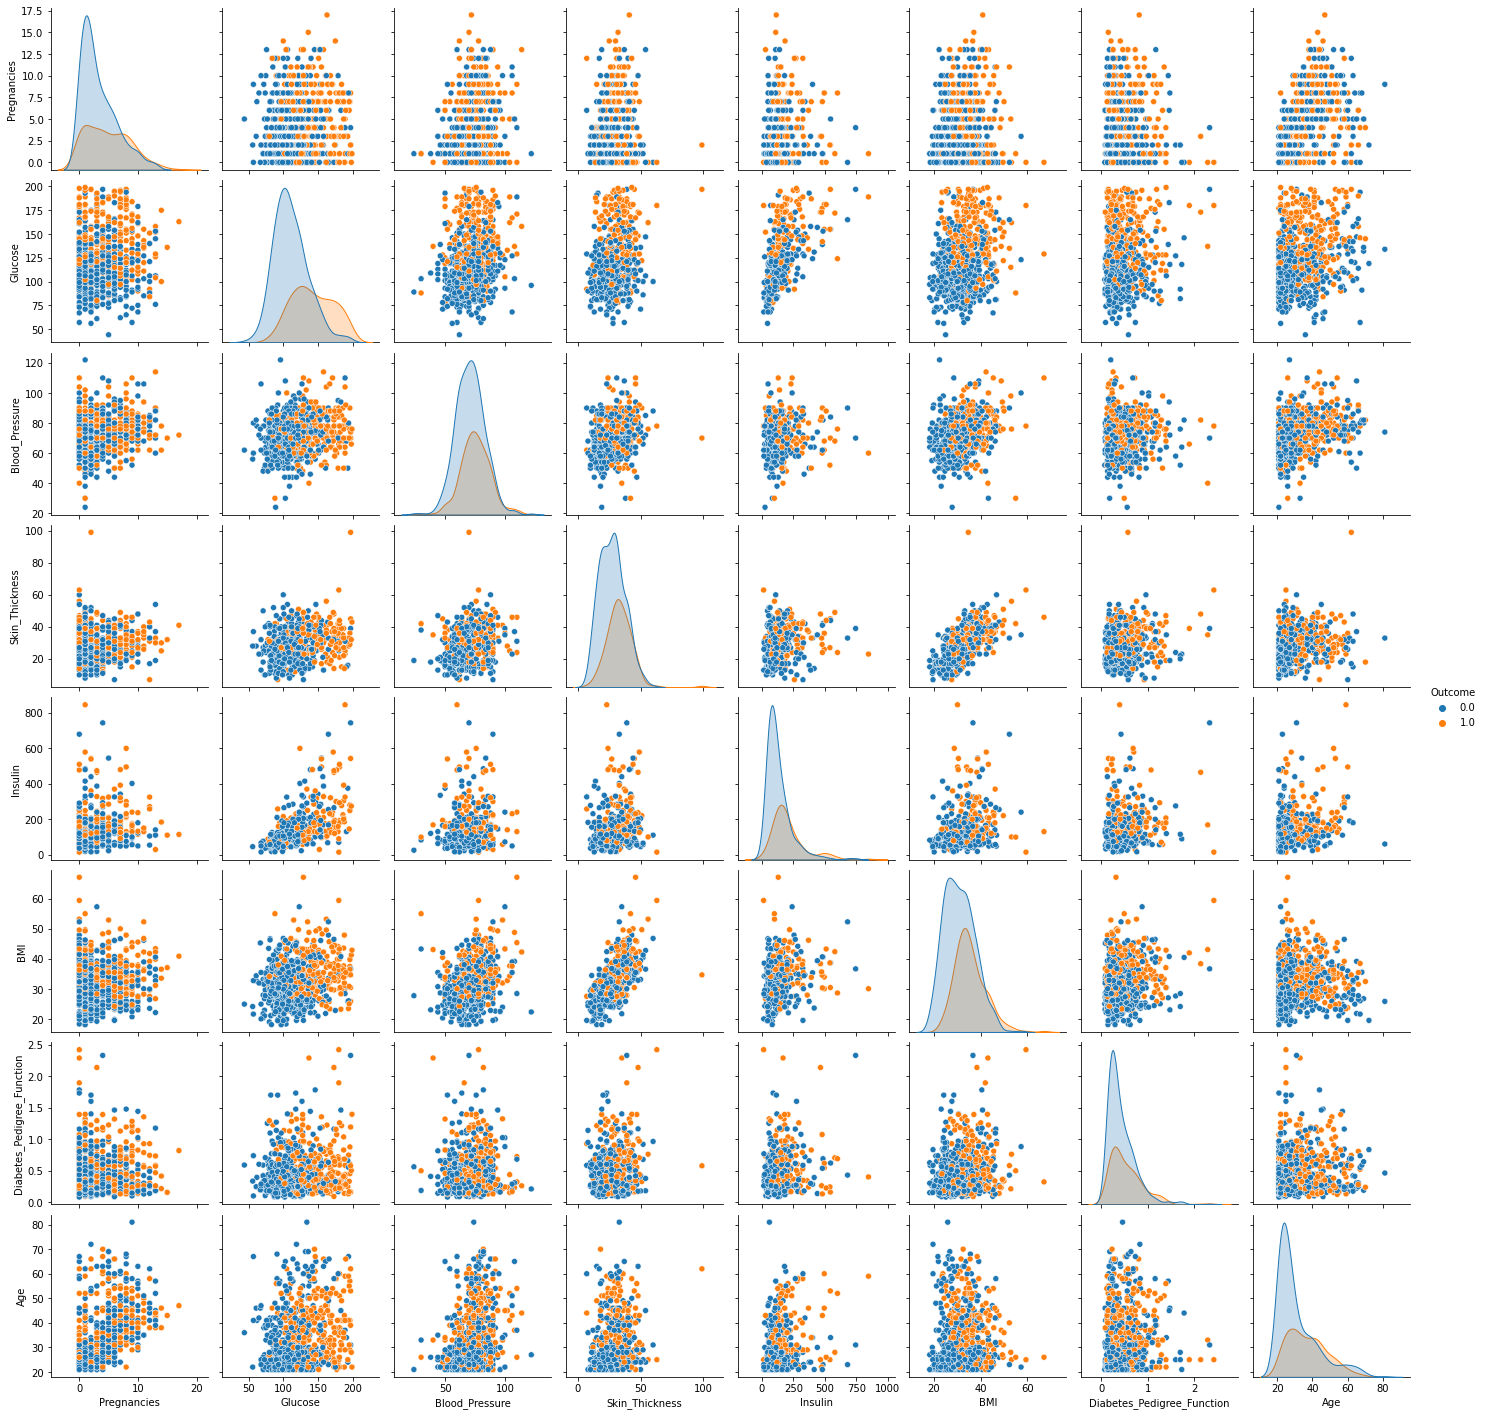

In [26]:
sns.pairplot(D, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin','BMI','Diabetes_Pedigree_Function','Age'] )

A pairwise plot has been used to create pairwise relationships in a dataset. The dataset comprised all female patients who are at an age of around 21 years. Outcome takes values 0 or 1, where 0 indicates negative for diabetes and 1 indicates positive for diabetes.\
There is no obvious relationship between age and onset of diabetes.\
There is no obvious relationship between Diabetes Pedigree Function and onset of diabetes.\
This may suggest that diabetes is not hereditary, or that the Diabetes Pedigree Function needs work.\
Larger values of Glucose combined with larger values for age, Diabetes Pedigree Function, insulin, Skin Thickness, mass and Blood pressure tends to show greater likelihood of testing positive for diabetes.

We shall add some features to the dataset before giving the data for fitting it into machine learning models.\
Adding BMI discription feature:

In [114]:
def s_bmi(row):                                #defining the function s_bmi
    if row["BMI"] < 18.5:                              #creating rules for the function with if and elif condition
        return "Under"
    elif row["BMI"] >= 18.5 and row["BMI"] <= 24.9:
        return "Healthy"
    elif row["BMI"] >= 25 and row["BMI"] <= 29.9:
        return "Over"
    elif row["BMI"] >= 30:
        return "Obese"

In [115]:
D = D.assign(BMI_Discription=D.apply(s_bmi, axis=1))       #Calling the above defined function and assigning it to D using assign()
D.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome,BMI_Discription
0,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0,Over
1,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0,Healthy
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Over
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Obese
4,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0.0,Over


Under 18.5 – is considered underweight and possibly malnourished.\
18.5 to 24.9 – is within a healthy weight range for young and middle-aged adults.\
25.0 to 29.9 – is considered overweight.\
Over 30 – is considered obese.

Adding Insulin Description feature:

In [116]:
def s_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [117]:
D = D.assign(Insulin_Description=D.apply(s_insulin, axis=1))
D.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome,BMI_Discription,Insulin_Description
0,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0,Over,Normal
1,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0,Healthy,Normal
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Over,Normal
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Obese,Abnormal
4,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0.0,Over,Normal


If insulin level is >= 16 and <= 166 then it is normal range else it is considered as Abnormal

Checking the relation of Insulin Description and outcome:

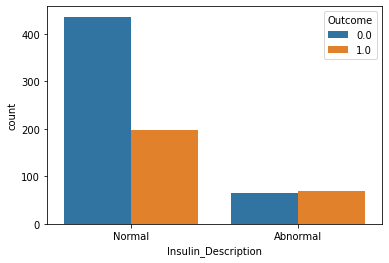

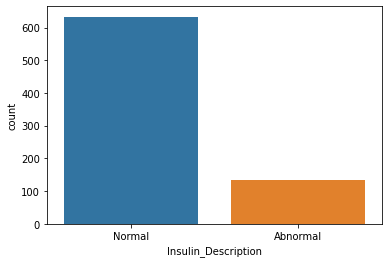

Number of patients Having Abnormal Insulin Levels:  134
Number of patients Having Normal Insulin Levels:  633


In [90]:
sns.countplot(data=D, x = 'Insulin_Description', hue='Outcome')
plt.show()
sns.countplot(data=D, x = 'Insulin_Description')
plt.show()
B, A = D['Insulin_Description'].value_counts()
print('Number of patients Having Abnormal Insulin Levels: ',A)
print('Number of patients Having Normal Insulin Levels: ',B)

It seems from the above plot we can infer more than 600 patients have Normal Insulin Levels where as around 130 patients have Abnormal Insulin Levels.\
Out of which Diabetic patients have slightly higher abnormal insulin.

Checking the relation of BMI Description and outcome:

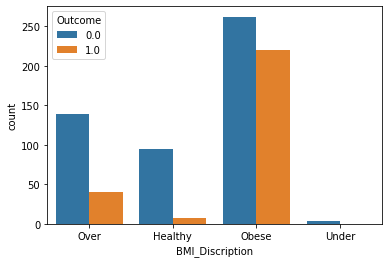

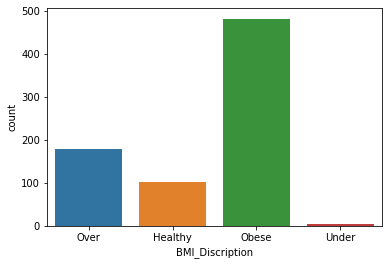

In [91]:
sns.countplot(data=D, x = 'BMI_Discription',hue ='Outcome')
plt.show()
sns.countplot(data=D, x = 'BMI_Discription')
plt.show()

From the above plot we can clearly see that obese catogery have high count of diabetic patients and also Obese patients are more in number.

Checking the relation of Glucose, Insulin Description, blood pressure and outcome:

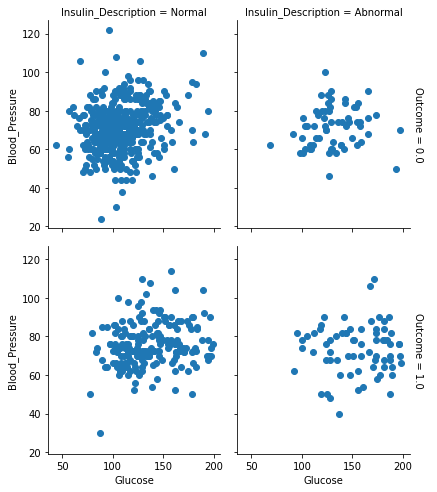

In [92]:
g = sns.FacetGrid(D, col="Insulin_Description", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Glucose", "Blood_Pressure")
plt.subplots_adjust(top=1.1)

From the above 1st graph we can see that density of Blood pressure and glucose are concentrated on lower level for normal insulin description, and scatterd on a bit higher level for Abnormal insulin description for non diabetic patients.\
From the above 2nd graph we can see that density of Blood pressure and glucose are concentrated on bit higher level for normal insulin description, and scatterd on a bit higher level than normal insulin for Abnormal insulin description for diabetic patients.

Checking the relation of Age, Insulin Description and outcome:

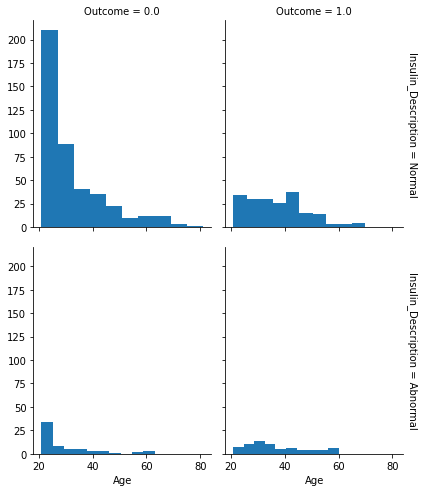

In [48]:
g = sns.FacetGrid(D, col="Outcome", row="Insulin_Description",margin_titles=True)
g.map(plt.hist, "Age")
plt.subplots_adjust(top=1.1)

From the above 1st graph we can see that density of Age is concentrated on lower level for normal insulin description, and scatterd on a bit higher level and uniform upto age 70 for Abnormal insulin description for non diabetic patients.\
From the above 2nd graph we can see that density age is concentrated on bit lower level with slight uniform distribution for normal insulin description, and scatterd on a bit higher level with slight uniform distribution upto age 60 for Abnormal insulin description for diabetic patients.

Checking the relation of Age, Insulin Description and outcome:

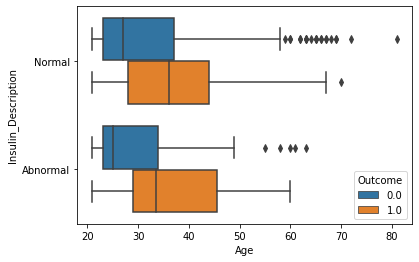

In [49]:
sns.boxplot(x="Age", y="Insulin_Description", hue="Outcome", data=D);

From the above plot that patients having normal insulin levels are more diabetic within the age range from 25 and 42 where as patients having anormal insulin levels are more diabetic in the age range from 28 to 45 but most common age is around 34 for abnormal insulin and around 37 for normal insulin levels.

Checking the relation of Age, BMI Description and outcome:

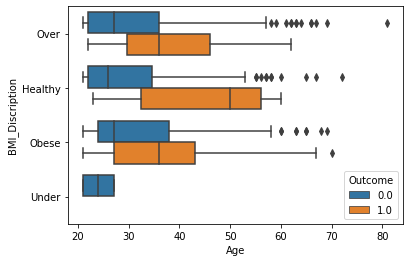

In [118]:
sns.boxplot(x="Age", y="BMI_Discription", hue="Outcome", data=D);

From the above plot it is evident that patients who are obese as per BMI index are more diabetic in early age of 25 where as patients who are overweight are prone to diabetes in early 30's, where as patients who are under weight are very low prone to diabetic. The most common age of dibetic for both Over and obese BMI index is around 37.

In [99]:
X=D.drop(columns=['Outcome','Insulin_Description','BMI_Discription'], axis=1)
Y=D['Outcome']
from sklearn.preprocessing import StandardScaler   # performing preprocessing part
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
X.head()


,0,1,2,3,4,5,6,7
0,-0.843726,-1.203741,-0.529560,-0.011423,-0.181663,-0.851443,-0.364265,-0.188940
1,1.234240,2.017463,-0.694899,-0.011423,-0.181663,-1.331439,0.604701,-0.103795
2,-0.843726,-1.072264,-0.529560,-0.694122,-0.540538,-0.633263,-0.919684,-1.040393
3,-1.140579,0.505469,-2.678971,0.671276,0.316130,1.548539,5.482732,-0.018650
4,0.343683,-0.184789,0.131797,-0.011423,-0.181663,-0.996897,-0.817052,-0.274086


As the range of all the columns are different and varying highily it will be difficult to build a ML model hence we are bringing them to a standerdized range so that we can insert the Data in ML models.

Feature Extraction

In [100]:
from sklearn.decomposition import PCA
pca=PCA()
fit=pca.fit(X)

Using PCA tool to identify main axes of variance within a data set and also it allows for easy data exploration to understand the key variables in the data and spot outliers

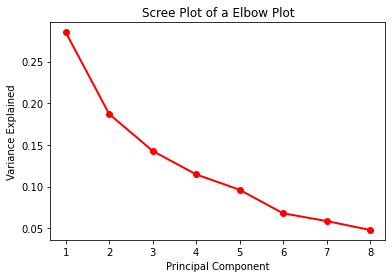

In [101]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='red') #plotting elbow plot to observe kink
plt.title('Scree Plot of a Elbow Plot')   #labeling the title, X and Y axis
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

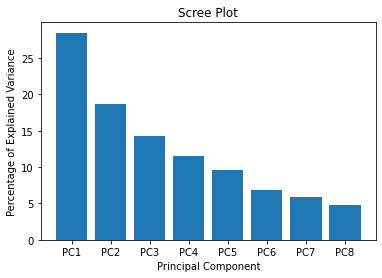

In [58]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)  #using barplot to visualize the transformed data
plt.ylabel('Percentage of Explained Variance')    #labeling the title, Xand Y axis
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

From the above two graphs we can infer the kink at PC2 as there is a large change in the varience compared to other components.

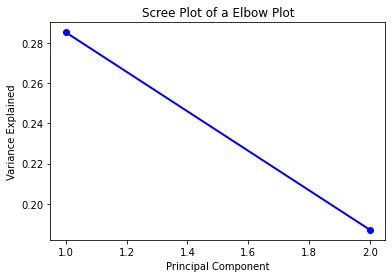

In [103]:
pca=PCA(n_components= 2)
fit=pca.fit(X)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot of a Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [104]:
pca.explained_variance_ratio_ #viewing the explained variance ratio

array([0.28519982, 0.18705774])

Getting the explained variance ratio as it gives the percentage of variance that is attributed by each of the selected components.

##Conclusion:
In this project we have taken all the necessary steps and got the following insights.
>Performed all the necessary data cleaning steps and delt with missing values.

>Transformed the skewed data using log transform.

>Found some correlaton between the attributes of the dataset provided

>The number of non diabetic patients is almost double of diabetic patients.

>Average Glucose level, Skin Thickness, Blood Pressure, Insulin level is more for Diabetic people and people with more age are more suseptable to Diabetic.

>Age group of around 30-45 are more suseptable to Diabeties

>BMI density is much high in the range 30-45 for diabetic cases

>Skin thickness and Insulin is high for higher range for diabetic cases compared to non diabetic cases

>Data is scaled using standardisation as most of the graph is normaly distributed and brought to single scale as the data varied in large range.

>Used PCA tool to identify main axes of variance within the data set and found PC2 as the kink

>Found Explained Variance ratio to get the percentage of varience that is attributed by each of the selected component.\

From all the above steps performed we can conclude that the data is ready for applying it to Machine learning models to predict whether or not a patient has diabetes

